<a href="https://colab.research.google.com/github/Schwarzam/NN-SPLUS/blob/master/Classification_with_pretraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
from os.path import isfile, join

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/trainsets/ClassGalaxies.zip \
    -O /tmp/ClassGalaxies.zip

--2020-07-27 15:45:41--  https://storage.googleapis.com/trainsets/ClassGalaxies.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21166190 (20M) [application/zip]
Saving to: ‘/tmp/ClassGalaxies.zip’

/tmp/ClassGalaxies. 100%[===================>]  20.19M  16.9MB/s    in 1.2s    

2020-07-27 15:45:43 (16.9 MB/s) - ‘/tmp/ClassGalaxies.zip’ saved [21166190/21166190]



In [ ]:
local_zip = '/tmp/ClassGalaxies.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
base_dir = '/tmp/Galaxies/'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training merger pictures
train_merger_dir = os.path.join(train_dir, 'Merger')
# Directory with our training spiral pictures
train_spiral_dir = os.path.join(train_dir, 'Spiral')
# Directory with our training elliptical pictures
train_elliptical_dir = os.path.join(train_dir, 'Elliptical')
# Directory with our training lenticular pictures
train_lenticular_dir = os.path.join(train_dir, 'Lenticular')

# Directory with our training merger pictures
test_merger_dir = os.path.join(test_dir, 'Merger')
# Directory with our training spiral pictures
test_spiral_dir = os.path.join(test_dir, 'Spiral')
# Directory with our training elliptical pictures
test_elliptical_dir = os.path.join(test_dir, 'Elliptical')
# Directory with our training lenticular pictures
test_lenticular_dir = os.path.join(test_dir, 'Lenticular')

# Directory with our validation merger pictures
validation_merger_dir = os.path.join(validation_dir, 'Merger')
# Directory with our validation spiral pictures
validation_spiral_dir = os.path.join(validation_dir, 'Spiral')
# Directory with our validation elliptical pictures
validation_elliptical_dir = os.path.join(validation_dir, 'Elliptical')
# Directory with our validation lenticular pictures
validation_lenticular_dir = os.path.join(validation_dir, 'Lenticular')

try:
  os.mkdir(train_dir)
  os.mkdir(test_dir)
  os.mkdir(validation_dir)
except:
  pass

try:
  os.mkdir(train_merger_dir)
  os.mkdir(train_spiral_dir)
  os.mkdir(train_elliptical_dir)
  os.mkdir(train_lenticular_dir)

  os.mkdir(test_merger_dir)
  os.mkdir(test_spiral_dir)
  os.mkdir(test_elliptical_dir)
  os.mkdir(test_lenticular_dir)

  os.mkdir(validation_merger_dir)
  os.mkdir(validation_spiral_dir)
  os.mkdir(validation_elliptical_dir)
  os.mkdir(validation_lenticular_dir)
except:
  pass

In [ ]:
Merger_dir = os.path.join(base_dir, 'Merger')
Spiral_dir = os.path.join(base_dir, 'Spiral')
Elliptical_dir = os.path.join(base_dir, 'Elliptical')
Lenticular_dir = os.path.join(base_dir, 'Lenticular')

In [ ]:
train_set = 0.7
test_set = 0.2
val_set = 0.1

In [ ]:
source_dirs = [Merger_dir, Spiral_dir, Elliptical_dir, Lenticular_dir]

## create train dirs
for src in source_dirs:
  files = [f for f in listdir(src) if isfile(join(src, f))]

  if str(src).split('/')[3] == 'Merger':
    dest = train_merger_dir
  if str(src).split('/')[3] == 'Spiral':
    dest = train_spiral_dir
  if str(src).split('/')[3] == 'Elliptical':
    dest = train_elliptical_dir
  if str(src).split('/')[3] == 'Lenticular':
    dest = train_lenticular_dir

  files = files[0:int(train_set*len(files))]

  for filename in files:
    source = os.path.join(src, filename)
    dst = os.path.join(dest, filename)
    shutil.copyfile(source, dst)
    del source
    dst = dest

## create test dirs
for src in source_dirs:
  files = [f for f in listdir(src) if isfile(join(src, f))]

  if str(src).split('/')[3] == 'Merger':
    dest = test_merger_dir
  if str(src).split('/')[3] == 'Spiral':
    dest = test_spiral_dir
  if str(src).split('/')[3] == 'Elliptical':
    dest = test_elliptical_dir
  if str(src).split('/')[3] == 'Lenticular':
    dest = test_lenticular_dir

  files = files[int(train_set*len(files)):int(train_set*len(files)) + int(test_set*len(files))]

  for filename in files:
    source = os.path.join(src, filename)
    dst = os.path.join(dest, filename)
    shutil.copyfile(source, dst)
    del source
    dst = dest

## create validation dirs
for src in source_dirs:
  files = [f for f in listdir(src) if isfile(join(src, f))]

  if str(src).split('/')[3] == 'Merger':
    dest = validation_merger_dir
  if str(src).split('/')[3] == 'Spiral':
    dest = validation_spiral_dir
  if str(src).split('/')[3] == 'Elliptical':
    dest = validation_elliptical_dir
  if str(src).split('/')[3] == 'Lenticular':
    dest = validation_lenticular_dir

  files = files[int(train_set*len(files)) + int(test_set*len(files)):int(train_set*len(files)) + int(test_set*len(files)) + int(val_set*len(files))]

  for filename in files:
    source = os.path.join(src, filename)
    dst = os.path.join(dest, filename)
    shutil.copyfile(source, dst)
    del source
    dst = dest

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(217,217),
    batch_size=20,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(217,217),
    batch_size=20,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(217,217),
    batch_size=20,
    class_mode='categorical'
)

Found 1867 images belonging to 4 classes.
Found 532 images belonging to 4 classes.
Found 265 images belonging to 4 classes.


In [ ]:
#from keras.applications import VGG16

#conv_base = VGG16(weights='imagenet',
#                  include_top=False,
#                  input_shape=(217, 217, 3))

from keras.applications import InceptionV3

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(217, 217, 3))

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

In [ ]:
#conv_base.treinable = True

#set_trainable = False
#for layer in conv_base.layers:
#  if layer.name  == 'block5_conv1':
#    set_trainable = True
#  if set_trainable:
#    layer.trainable = True
#  else:
#    layer.trainable = False

In [ ]:
from keras import layers, models

model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [ ]:
from keras import optimizers
model.compile(loss = 'categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
      train_generator,
      epochs=75,
      validation_data=test_generator,
      verbose=1)

Epoch 1/75
94/94 [==============================] - 89s 951ms/step - loss: 0.8881 - accuracy: 0.7167 - val_loss: 1.9414 - val_accuracy: 0.4211
Epoch 2/75
94/94 [==============================] - 59s 633ms/step - loss: 0.4415 - accuracy: 0.8361 - val_loss: 3.4259 - val_accuracy: 0.3684
Epoch 3/75
94/94 [==============================] - 60s 633ms/step - loss: 0.3689 - accuracy: 0.8500 - val_loss: 7.6797 - val_accuracy: 0.4643
Epoch 4/75
94/94 [==============================] - 59s 633ms/step - loss: 0.3385 - accuracy: 0.8731 - val_loss: 3.1538 - val_accuracy: 0.8289
Epoch 5/75
94/94 [==============================] - 60s 636ms/step - loss: 0.2979 - accuracy: 0.8918 - val_loss: 1.7985 - val_accuracy: 0.8102
Epoch 6/75
94/94 [==============================] - 60s 639ms/step - loss: 0.2851 - accuracy: 0.8923 - val_loss: 0.8238 - val_accuracy: 0.8571
Epoch 7/75
94/94 [==============================] - 60s 640ms/step - loss: 0.2858 - accuracy: 0.9009 - val_loss: 6.5265e-04 - val_accuracy: 0.

In [ ]:
resultado = model.evaluate(validation_generator)
resultado

14/14 [==============================] - 3s 235ms/step


[0.008394962176680565, 0.8943396210670471]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

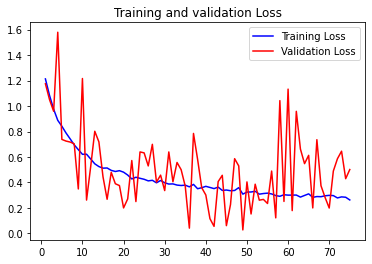

In [ ]:
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()

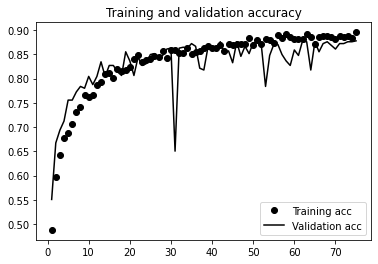

In [ ]:
plt.plot(epochs, acc, 'ko', label='Training acc')
plt.plot(epochs, val_acc, 'k', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

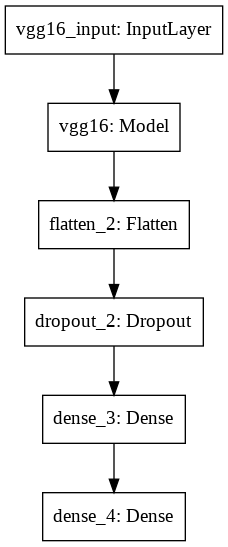

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='vgg.png')